<a href="https://colab.research.google.com/github/Samuel-Solomon-1/-Project-1-Data-Collection-and-Initial-Analysis-of-Stock-Market-Data/blob/main/Project_1_Data_Collection_and_Initial_Analysis_of_Stock_Market_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Data Collection and Initial Analysis of Stock Market Data

## Introduction

This assignment provides hands-on experience working with historical stock market data. The project focuses on data handling, cleaning, and performing exploratory data analysis (EDA). We will explore long-term stock trends and identify how various financial indicators have changed over time.

By the end of this project, we aim to have:
- A clean and structured dataset.
- A strong understanding of its components.
- Initial insights and potential hypotheses for future analysis.

## Task 1: Data Collection

1. Register and download the dataset files:
   - `historical_stocks.csv`
   - `historical_stock_prices.csv`

2. Load both datasets into Pandas DataFrames.
3. Display basic information to understand the structure, types, and shape of the data.

The datasets contain columns like `Date`, `Open`, `High`, `Low`, `Close`, `Volume`, and `Adjusted Close`, along with stock identifiers.

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Define the full path to your dataset in Google Drive
folder_path = '/content/drive/My Drive/'
stocks_path = f'{folder_path}/historical_stocks.csv'
prices_path = f'{folder_path}/historical_stock_prices.csv'

# Step 3: Load datasets using Pandas
import pandas as pd

# Load the data
stocks_df = pd.read_csv(stocks_path)
prices_df = pd.read_csv(prices_path)

# Display basic previews
print("Stocks Dataset Sample:")
display(stocks_df.head())

print("\nStock Prices Dataset Sample:")
display(prices_df.head())

# Check data types and general info
print("\nStocks Dataset Info:")
print(stocks_df.info())

print("\nPrices Dataset Info:")
print(prices_df.info())

Mounted at /content/drive
Stocks Dataset Sample:


,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS



Stock Prices Dataset Sample:


,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14



Stocks Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    6460 non-null   object
 1   exchange  6460 non-null   object
 2   name      6460 non-null   object
 3   sector    5020 non-null   object
 4   industry  5020 non-null   object
dtypes: object(5)
memory usage: 252.5+ KB
None

Prices Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20973889 entries, 0 to 20973888
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ticker     object 
 1   open       float64
 2   close      float64
 3   adj_close  float64
 4   low        float64
 5   high       float64
 6   volume     int64  
 7   date       object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.3+ GB
None


## Task 2: Data Cleaning

In this step, we’ll clean both datasets:

### For `stocks_df`:
- Identify and handle missing values in `sector` and `industry`
- Check and remove any duplicates

### For `prices_df`:
- Convert the `date` column to datetime
- Remove duplicates
- Handle any missing values (if present)
- Set `date` as the index for time-series analysis

Cleaning ensures consistent structure and reliable analysis moving forward.

In [ ]:
# --- Cleaning stocks_df ---
print("Missing values in stocks_df:")
print(stocks_df.isnull().sum())

# Optional: Fill missing sector/industry with 'Unknown' or drop
stocks_df['sector'] = stocks_df['sector'].fillna('Unknown')
stocks_df['industry'] = stocks_df['industry'].fillna('Unknown')

# Drop duplicates if any
before = stocks_df.shape[0]
stocks_df = stocks_df.drop_duplicates()
after = stocks_df.shape[0]
print(f"Removed {before - after} duplicate rows from stocks_df.")

# --- Cleaning prices_df ---
print("\nMissing values in prices_df:")
print(prices_df.isnull().sum())

# Drop duplicates
before = prices_df.shape[0]
prices_df = prices_df.drop_duplicates()
after = prices_df.shape[0]
print(f" Removed {before - after} duplicate rows from prices_df.")

# Convert 'date' to datetime
prices_df['date'] = pd.to_datetime(prices_df['date'], errors='coerce')

# Drop any rows where date conversion failed (if any)
prices_df = prices_df.dropna(subset=['date'])

# Set date as index
prices_df = prices_df.set_index('date')
prices_df = prices_df.sort_index()

print("\n Data cleaning complete.")

Missing values in stocks_df:
ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64
Removed 0 duplicate rows from stocks_df.

Missing values in prices_df:
ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64
 Removed 0 duplicate rows from prices_df.

 Data cleaning complete.


## Task 3: Data Segmentation by Decade

To allow comparison of stock market behavior across decades, we’ll segment the cleaned `prices_df` dataset by decade.

### What we’ll do:
- Create a new column `decade` from the year in the date index
- Group data by decade into separate DataFrames for 1970s, 1980s, ..., 2010s
- These subsets will help us explore changes in trends, volumes, and prices over time

In [ ]:
# Extract year from datetime index
prices_df['year'] = prices_df.index.year

# Derive decade column
prices_df['decade'] = (prices_df['year'] // 10) * 10

# Confirm decade values
print("Decades available in dataset:")
print(prices_df['decade'].value_counts().sort_index())

# Create a dictionary to hold decade-wise DataFrames
decade_dfs = {}
for decade in sorted(prices_df['decade'].unique()):
    df_decade = prices_df[prices_df['decade'] == decade]
    decade_dfs[decade] = df_decade
    print(f"{decade}s: {df_decade.shape[0]:,} records")

Decades available in dataset:
decade
1970     164499
1980    1470571
1990    3427832
2000    6572053
2010    9338934
Name: count, dtype: int64
1970s: 164,499 records
1980s: 1,470,571 records
1990s: 3,427,832 records
2000s: 6,572,053 records
2010s: 9,338,934 records


## Task 4: Exploratory Data Analysis (Updated & Fixed)

In this step, we:

- Computed summary statistics for each decade
- Plotted monthly average Close prices over time
- Visualized trading volume distributions per decade (capped at 99th percentile to reduce outlier skew)
- Created log-scaled boxplots for Low prices to compare spread and outliers across decades

This helps identify trends, anomalies, and structural shifts in stock market behavior from the 1970s to the 2010s.


Summary statistics for 1970s
                 mean         median           std
open        12.491493       2.791667  4.698114e+01
high        12.640192       2.840909  4.748193e+01
low         12.366931       2.765625  4.651308e+01
close       12.491549       2.791667  4.698536e+01
volume  724893.644417  187200.000000  1.377366e+06

Summary statistics for 1980s
                 mean        median           std
open        16.814261      5.000000  5.730481e+02
high        17.095074      5.083333  5.828142e+02
low         16.561523      4.958333  5.622574e+02
close       16.824845      5.000000  5.750293e+02
volume  837523.351162  64600.000000  4.510088e+06

Summary statistics for 1990s
                 mean        median           std
open        45.291459     10.583831  1.391110e+03
high        46.871896     10.750000  1.464630e+03
low         43.814977     10.437500  1.329335e+03
close       45.303495     10.593750  1.391577e+03
volume  863527.185856  62200.000000  5.834012e+06

Sum

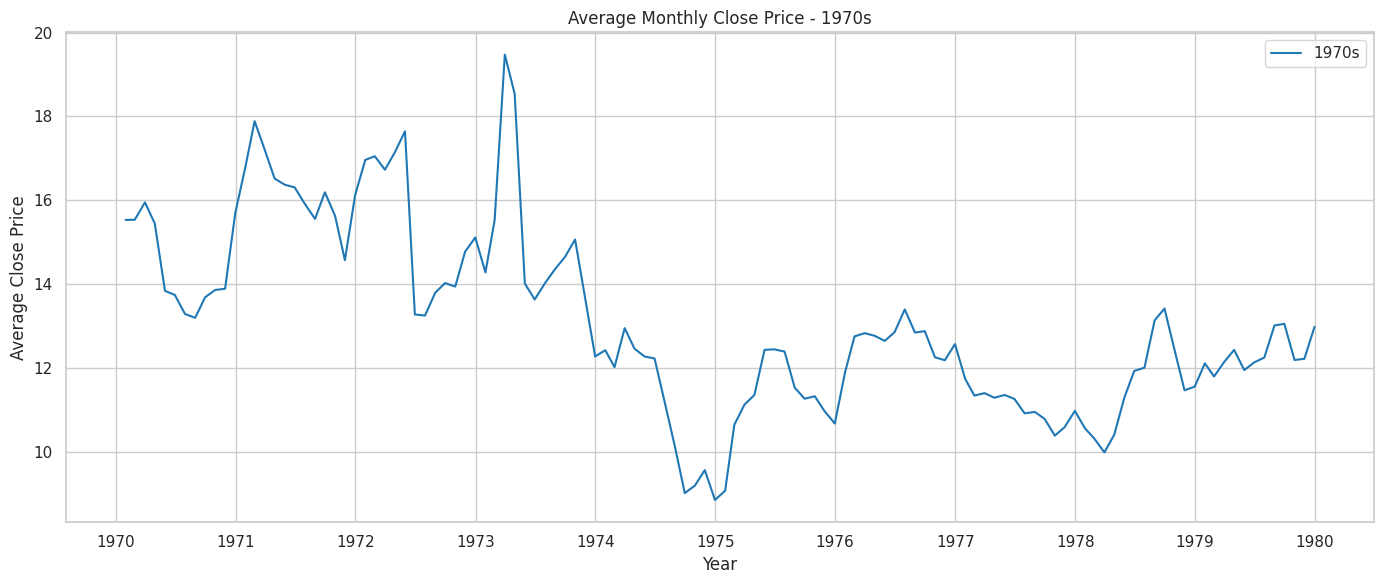

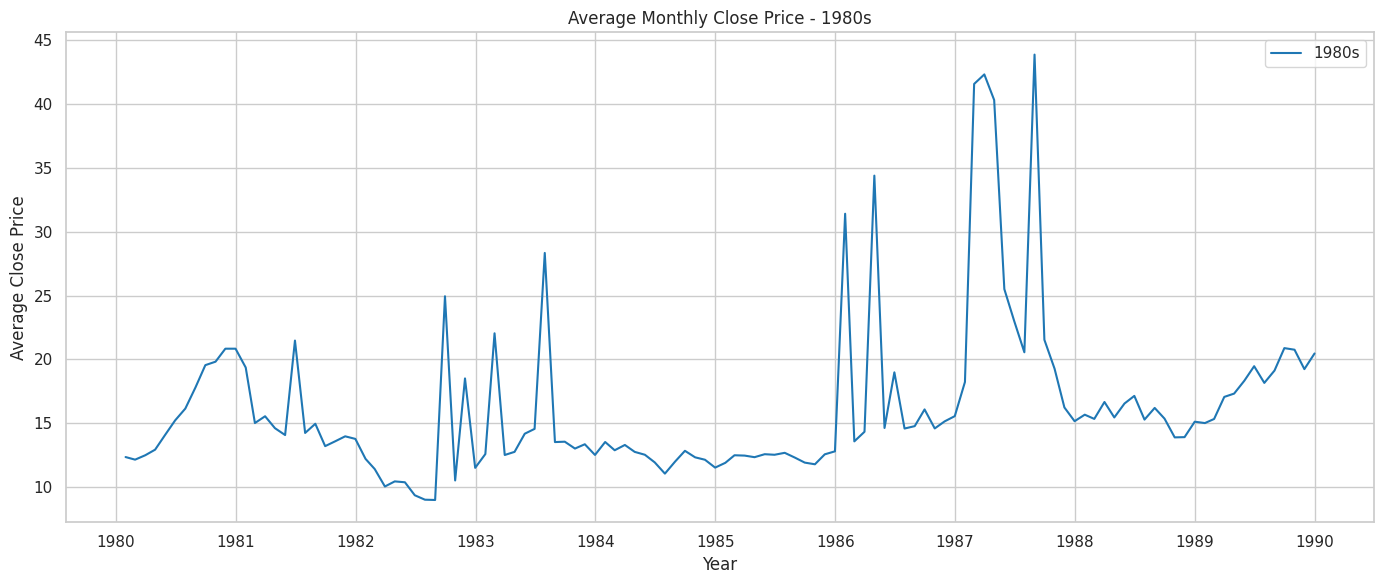

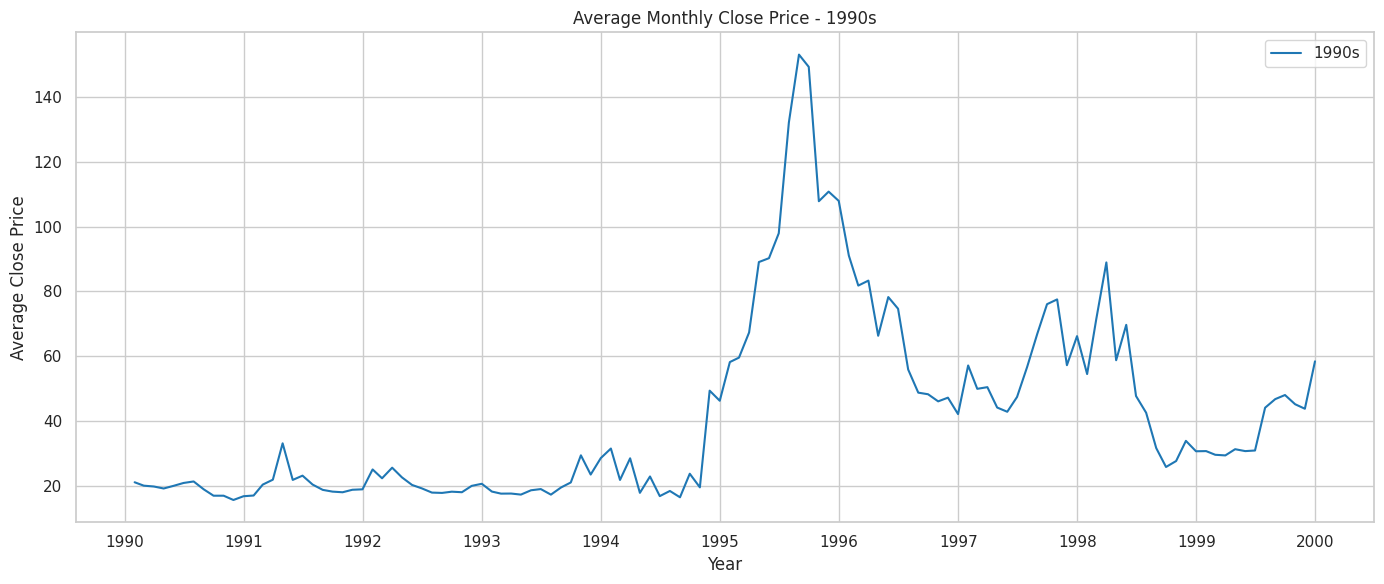

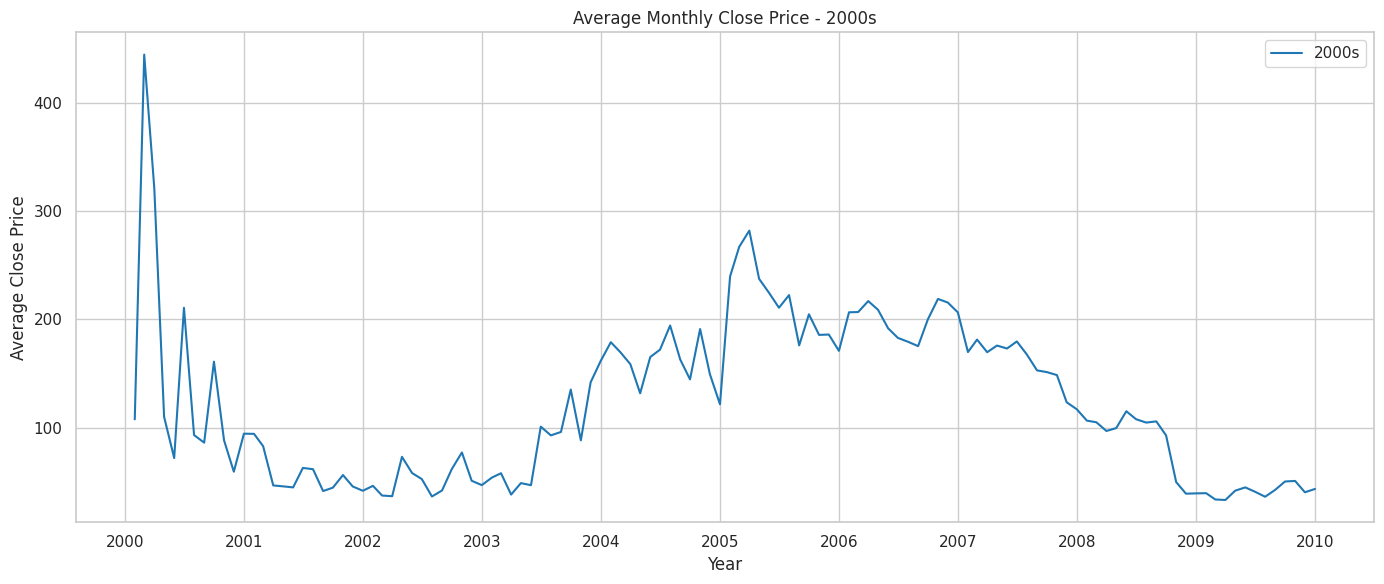

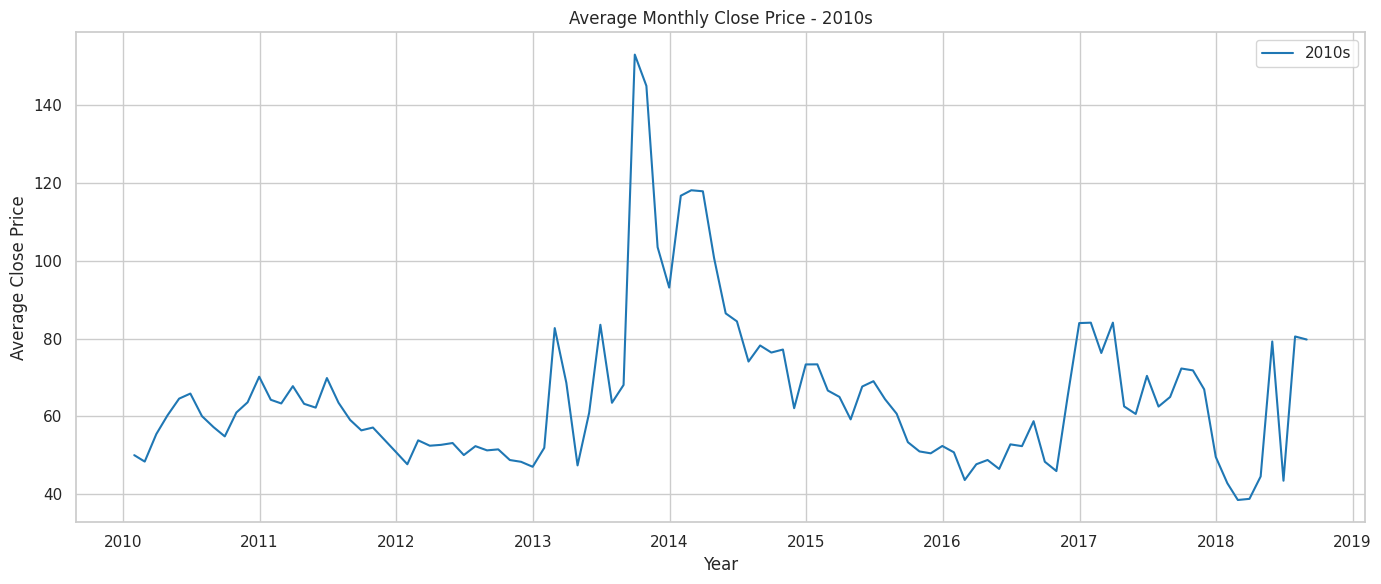

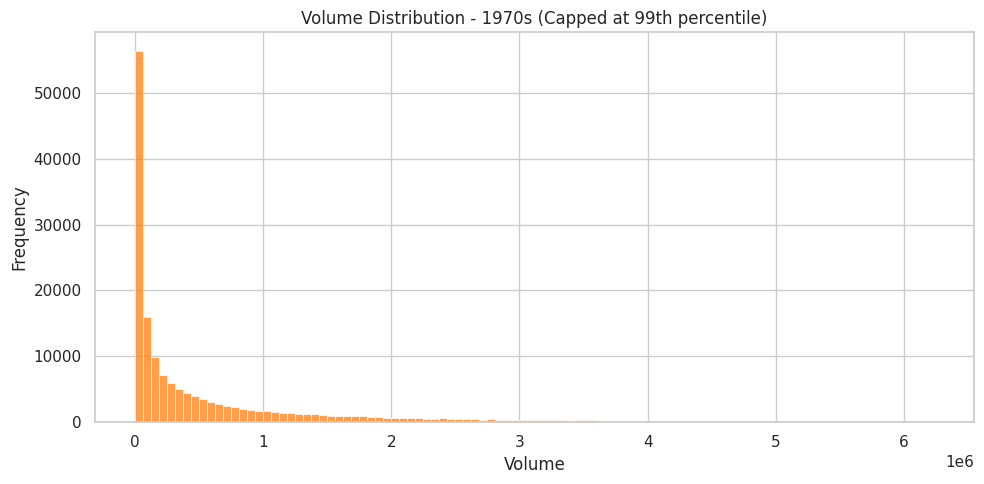

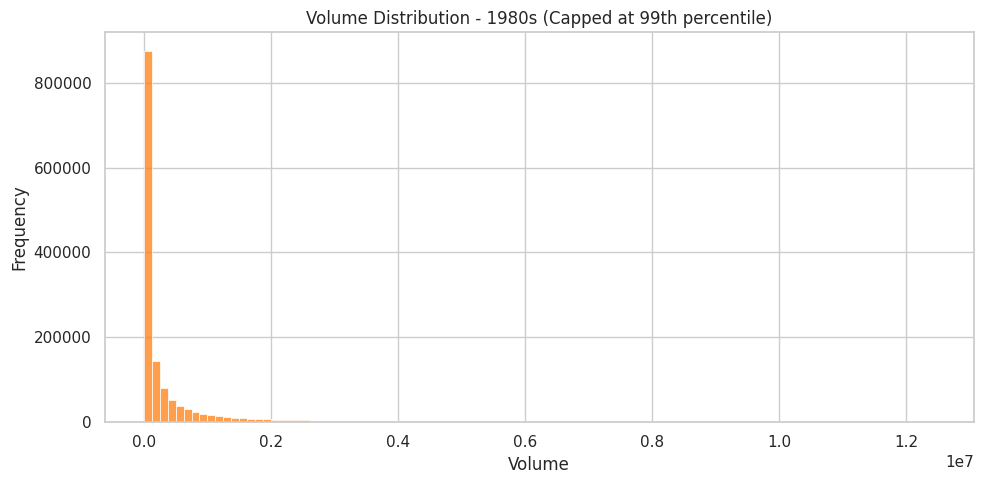

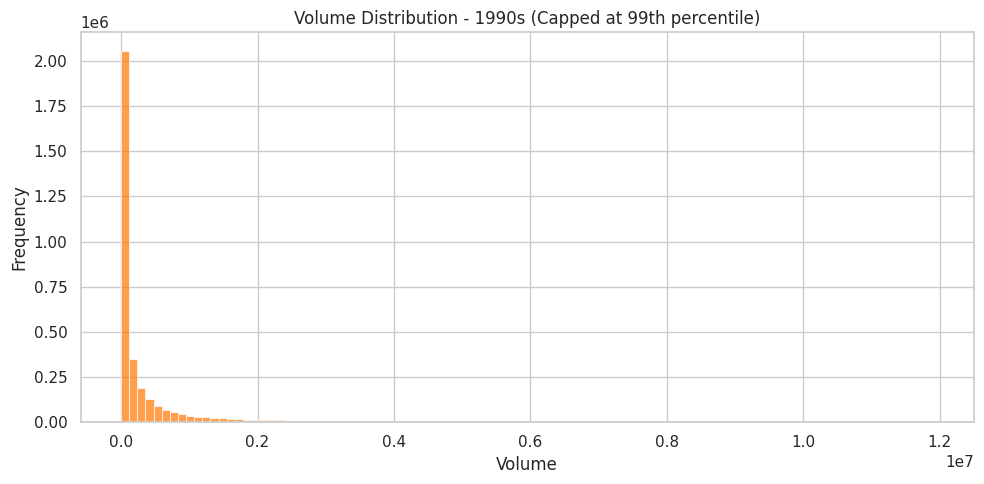

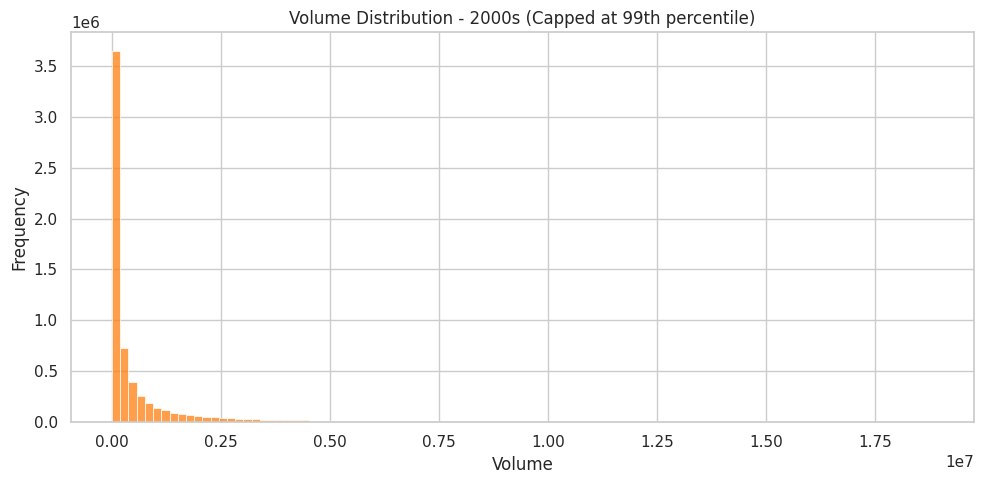

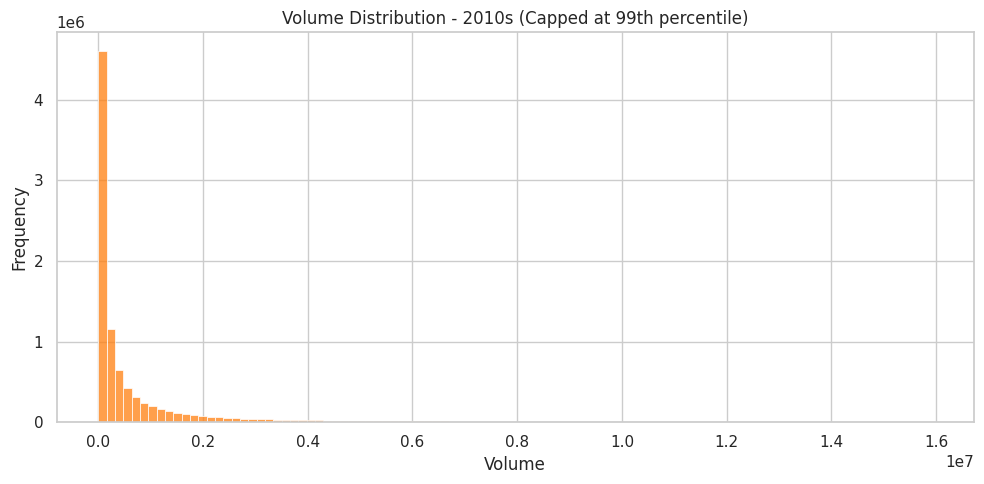

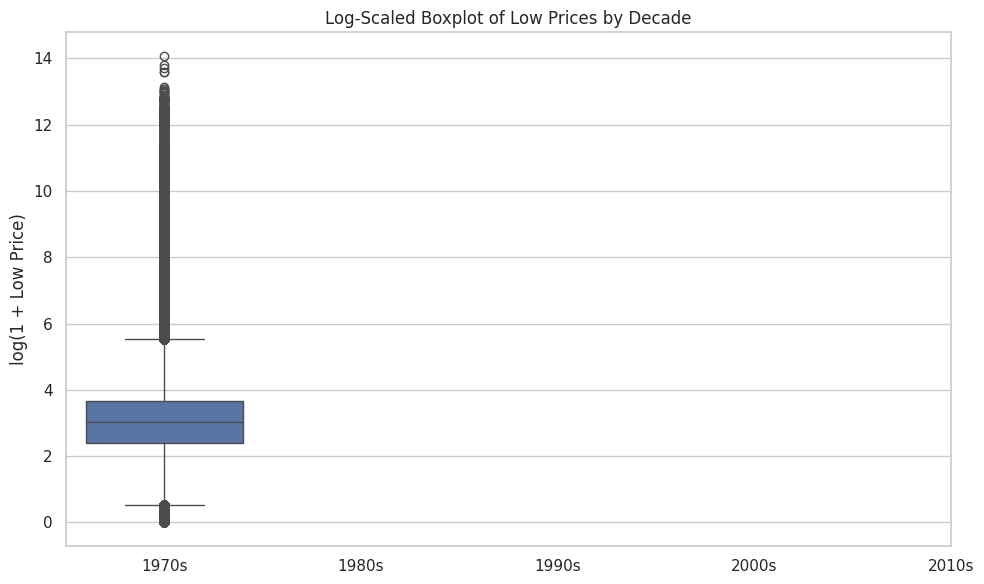

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

# Columns to analyze
price_cols = ['open', 'high', 'low', 'close', 'volume']

# 1. Summary Statistics
for decade, df in decade_dfs.items():
    print(f"\nSummary statistics for {decade}s")
    print(df[price_cols].describe().T[['mean', '50%', 'std']].rename(columns={'50%': 'median'}))

# 2. Time Series Plot: Monthly Average Close Price
for decade, df in decade_dfs.items():
    monthly_avg = df['close'].resample('ME').mean()  # Fixed 'M' deprecation warning

    plt.figure()
    plt.plot(monthly_avg, label=f'{decade}s', color='tab:blue')
    plt.title(f'Average Monthly Close Price - {decade}s')
    plt.xlabel('Year')
    plt.ylabel('Average Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 3. Volume Histogram: Cap at 99th percentile (per decade)
for decade, df in decade_dfs.items():
    plt.figure(figsize=(10, 5))

    volume_cap = df['volume'].quantile(0.99)
    clipped_volume = df[df['volume'] <= volume_cap]['volume']

    sns.histplot(clipped_volume, bins=100, kde=False, color='tab:orange')
    plt.title(f"Volume Distribution - {decade}s (Capped at 99th percentile)")
    plt.xlabel("Volume")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 4. Boxplot of Low Prices (Log Scaled to Handle Outliers)
low_data_log = [np.log1p(df['low'].dropna()) for d, df in sorted(decade_dfs.items())]
labels = [f"{d}s" for d in sorted(decade_dfs)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=low_data_log)
plt.title("Log-Scaled Boxplot of Low Prices by Decade")
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.ylabel("log(1 + Low Price)")
plt.tight_layout()
plt.show()

## Task 5: Comparative Analysis Across Decades

Now we compare key metrics across decades to understand:

- How stock prices have evolved
- Changes in trading volume
- Shifts in volatility

We summarize mean, median, and standard deviation of `close` prices and `volume` for each decade, then visualize the decade-wise trends in price levels, trading activity, and volatility.

,Decade,Close Mean,Close Median,Close Std,Volume Mean,Volume Median,Volume Std
0,1970s,12.491549,2.791667,46.985360,7.248936e+05,187200.0,1.377366e+06
1,1980s,16.824845,5.000000,575.029287,8.375234e+05,64600.0,4.510088e+06
2,1990s,45.303495,10.593750,1391.576526,8.635272e+05,62200.0,5.834012e+06
3,2000s,122.440812,16.584999,4509.781698,1.383562e+06,133400.0,9.230143e+06
4,2010s,65.278332,20.010000,1850.127729,1.320505e+06,165400.0,1.770789e+07


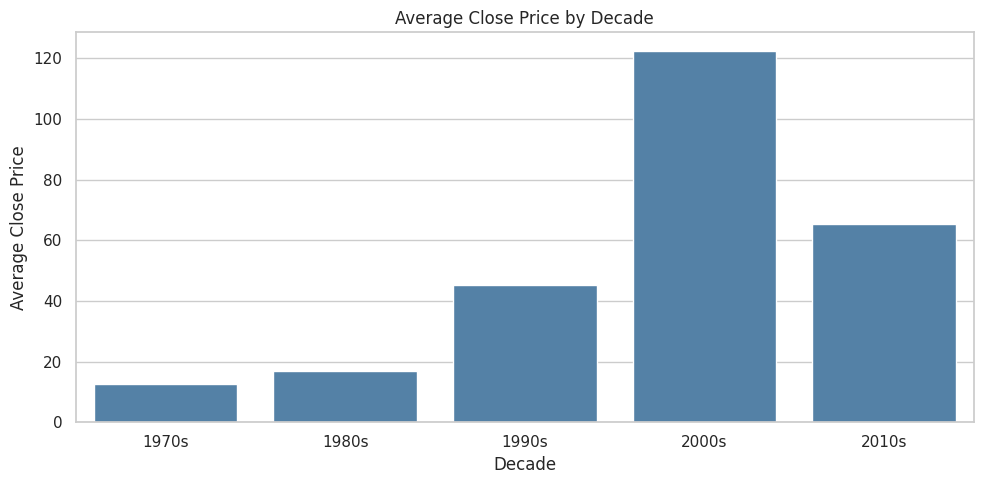

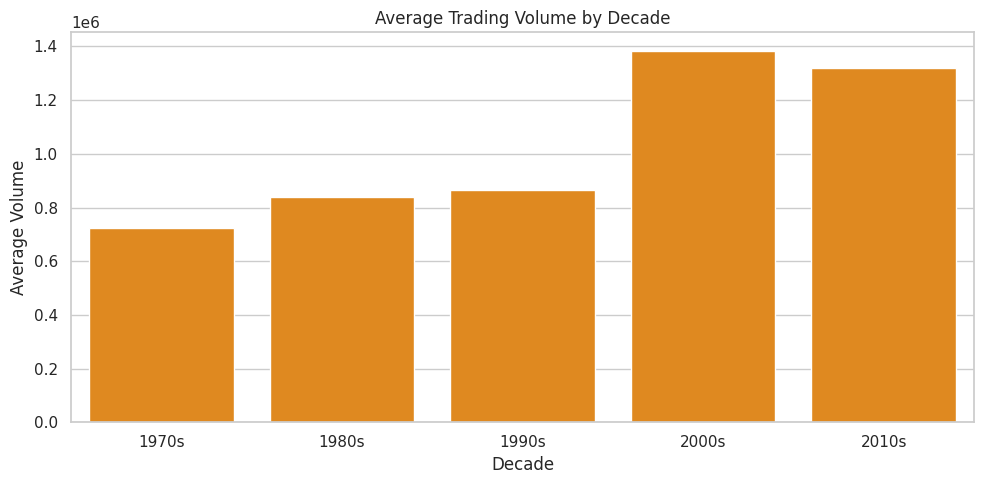

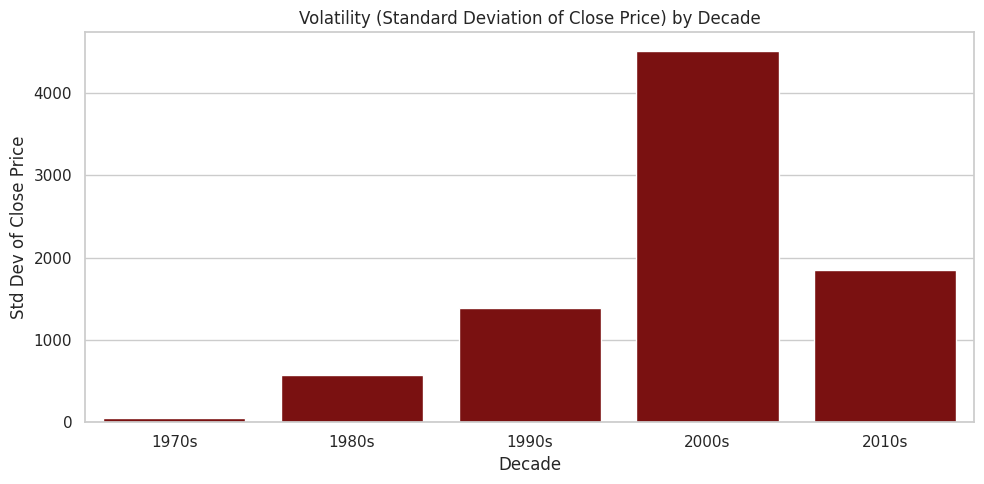

In [20]:
# 1. Build comparison DataFrame for close price and volume
summary_data = []

for decade, df in sorted(decade_dfs.items()):
    close_stats = df['close'].describe()
    volume_stats = df['volume'].describe()

    summary_data.append({
        'Decade': f"{decade}s",
        'Close Mean': close_stats['mean'],
        'Close Median': close_stats['50%'],
        'Close Std': close_stats['std'],
        'Volume Mean': volume_stats['mean'],
        'Volume Median': volume_stats['50%'],
        'Volume Std': volume_stats['std']
    })

comparison_df = pd.DataFrame(summary_data)
display(comparison_df)

# 2. Plot: Average Close Price per Decade
plt.figure(figsize=(10, 5))
sns.barplot(data=comparison_df, x='Decade', y='Close Mean', color='steelblue')
plt.title("Average Close Price by Decade")
plt.ylabel("Average Close Price")
plt.tight_layout()
plt.show()

# 3. Plot: Average Volume per Decade
plt.figure(figsize=(10, 5))
sns.barplot(data=comparison_df, x='Decade', y='Volume Mean', color='darkorange')
plt.title("Average Trading Volume by Decade")
plt.ylabel("Average Volume")
plt.tight_layout()
plt.show()

# 4. Plot: Volatility (Std Dev of Close Price)
plt.figure(figsize=(10, 5))
sns.barplot(data=comparison_df, x='Decade', y='Close Std', color='darkred')
plt.title("Volatility (Standard Deviation of Close Price) by Decade")
plt.ylabel("Std Dev of Close Price")
plt.tight_layout()
plt.show()

## Insights Gathered and Conclusion

### Key Findings and Trends

- **Stock Price Growth:**  
  From the 1970s to the 2000s, average closing prices rose sharply—from around \$12 to over \$120—indicating long-term market growth. In the 2010s, the average price dropped to around \$65, which may reflect increased market diversification and corrections.

- **Trading Volume Expansion:**  
  Average trading volume increased from ~724K in the 1970s to over 1.3M in the 2000s and 2010s, suggesting growing market participation, improved access to markets, and increased activity from both institutional and retail investors.

- **Volatility Trends:**  
  The standard deviation of closing prices—a proxy for volatility—rose significantly over the decades, from ~47 in the 1970s to ~4500 in the 2000s. This reflects heightened uncertainty, speculative activity, and rapid shifts in market behavior. The 2010s showed slightly less volatility but remained historically high.

- **Extreme Values and Distribution Skews:**  
  Histograms and boxplots revealed that trading volume and prices were highly skewed in later decades, with extreme outliers becoming more common—possibly due to algorithmic trading, tech IPOs, and increasing inequality in stock performance.

- **Seasonal or Cyclical Effects:**  
  Time series of monthly average close prices showed visible cyclical fluctuations, hinting at quarterly, yearly, or sentiment-driven patterns—though further seasonal decomposition is needed to confirm.


### Proposed Hypotheses for Deeper Analysis

- **Macroeconomic Influence:**  
  Inflation, GDP growth, and interest rates may strongly correlate with the rising average price levels and trading volume.

- **Technological and Regulatory Impact:**  
  The emergence of electronic trading, fintech platforms, and regulatory reforms (like the SEC's changes in the 2000s) might have contributed to increased volume and volatility.

- **Sector-Based Variation:**  
  Certain sectors (e.g., technology and finance) likely contributed disproportionately to price and volume growth. Future work could merge `sector` info to evaluate this.

- **Behavioral and Institutional Factors:**  
  The rise of day trading, index funds, and institutional investors could explain the shift in trading dynamics, especially after 2000.

---

These insights provide a strong foundation for further research into causality, sector-based performance, market cycles, and predictive modeling in future phases of analysis.